In [1]:
import tensorflow as  tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [4]:
embedding_layer = layers.Embedding(1000, 5)

In [5]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[-0.04799153, -0.01149664, -0.02300259, -0.01943617,  0.02093936],
       [ 0.01935158, -0.04366289, -0.01318121, -0.0333146 , -0.00276654],
       [ 0.04819573, -0.04517951, -0.01280708,  0.04873698,  0.00710068]],
      dtype=float32)

In [6]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [7]:
# export TFDS_HTTPS_PROXY=http:                  ##代理服务器IP:端口
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

In [8]:
encoder = info.features["text"].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [17]:
train_batches = train_data.shuffle(1000).padded_batch(10,([None],()))
test_batches = test_data.shuffle(1000).padded_batch(10,([None],()))

In [18]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  12,  174,  218, ...,    0,    0,    0],
       [  12,  284,   14, ...,    0,    0,    0],
       [  12,  109, 7968, ...,    0,    0,    0],
       ...,
       [ 688,  123, 5481, ...,    0,    0,    0],
       [  12,  196, 7968, ...,    0,    0,    0],
       [ 156,   37, 1192, ...,    0,    0,    0]], dtype=int64)

In [19]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 45s 18ms/step - loss: 0.4984 - accuracy: 0.7062 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.2812 - accuracy: 0.8837 - val_loss: 0.2953 - val_accuracy: 0.8700
Epoch 3/10
2500/2500 [==============================] - 21s 8ms/step - loss: 0.2287 - accuracy: 0.9108 - val_loss: 0.3850 - val_accuracy: 0.8300
Epoch 4/10
2500/2500 [==============================] - 21s 8ms/step - loss: 0.1959 - accuracy: 0.9265 - val_loss: 0.3569 - val_accuracy: 0.8500
Epoch 5/10
2500/2500 [==============================] - 21s 9ms/step - loss: 0.1715 - accuracy: 0.9364 - val_loss: 0.4193 - val_accuracy: 0.8800
Epoch 6/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.1553 - accuracy: 0.9440 - val_loss: 0.6087 - val_accuracy: 0.8100
Epoch 7/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.1410 - accuracy: 0.9486 - val_loss: 0.3716

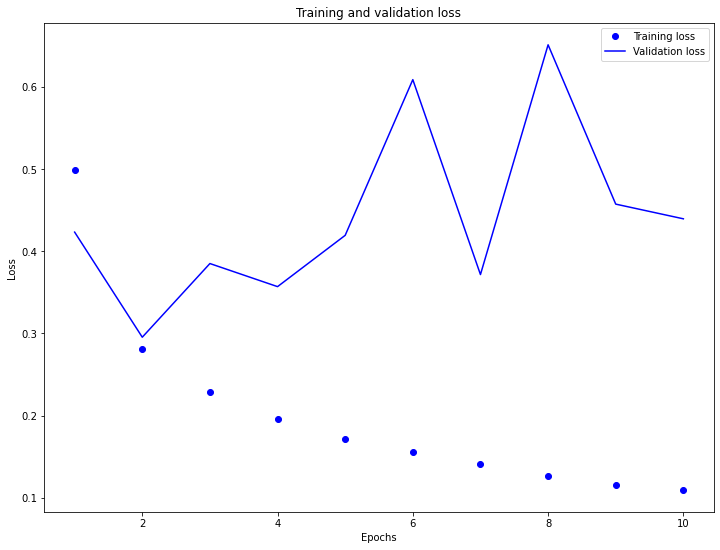

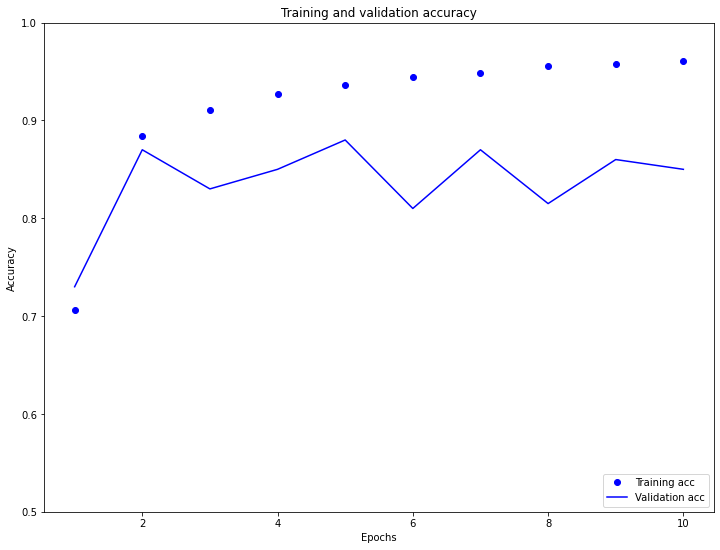

In [21]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()